In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("/content/sample_data/ToyotaCorolla - MLR.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
print(display(df))

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


None


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


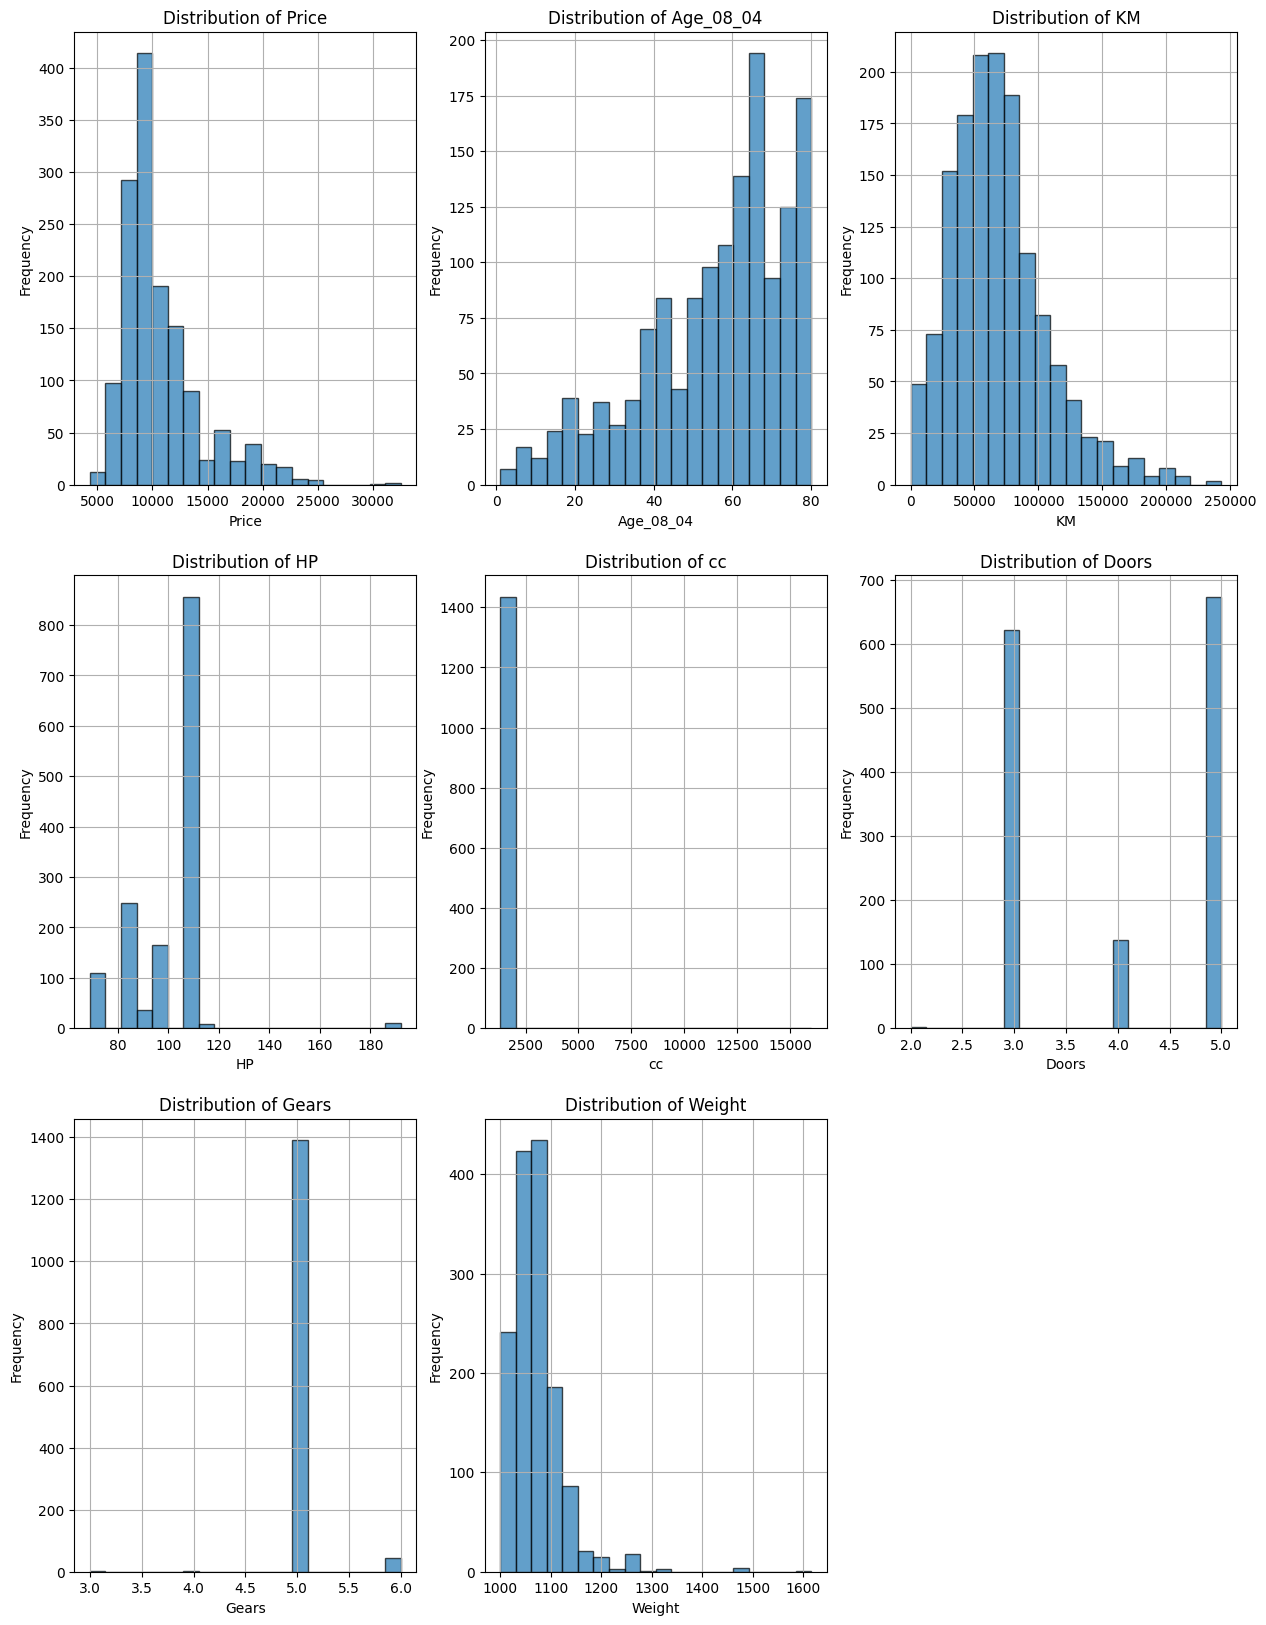

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#exclude Cylinders as it has only one unique value and doesnot provide useful distribution information
numerical_cols = [col for col in numerical_cols if col not in ['Cylinders','Automatic']]

num_cols_per_row = 3
num_rows = (len(numerical_cols) + num_cols_per_row - 1)

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows // num_cols_per_row, num_cols_per_row, i + 1)
    plt.hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

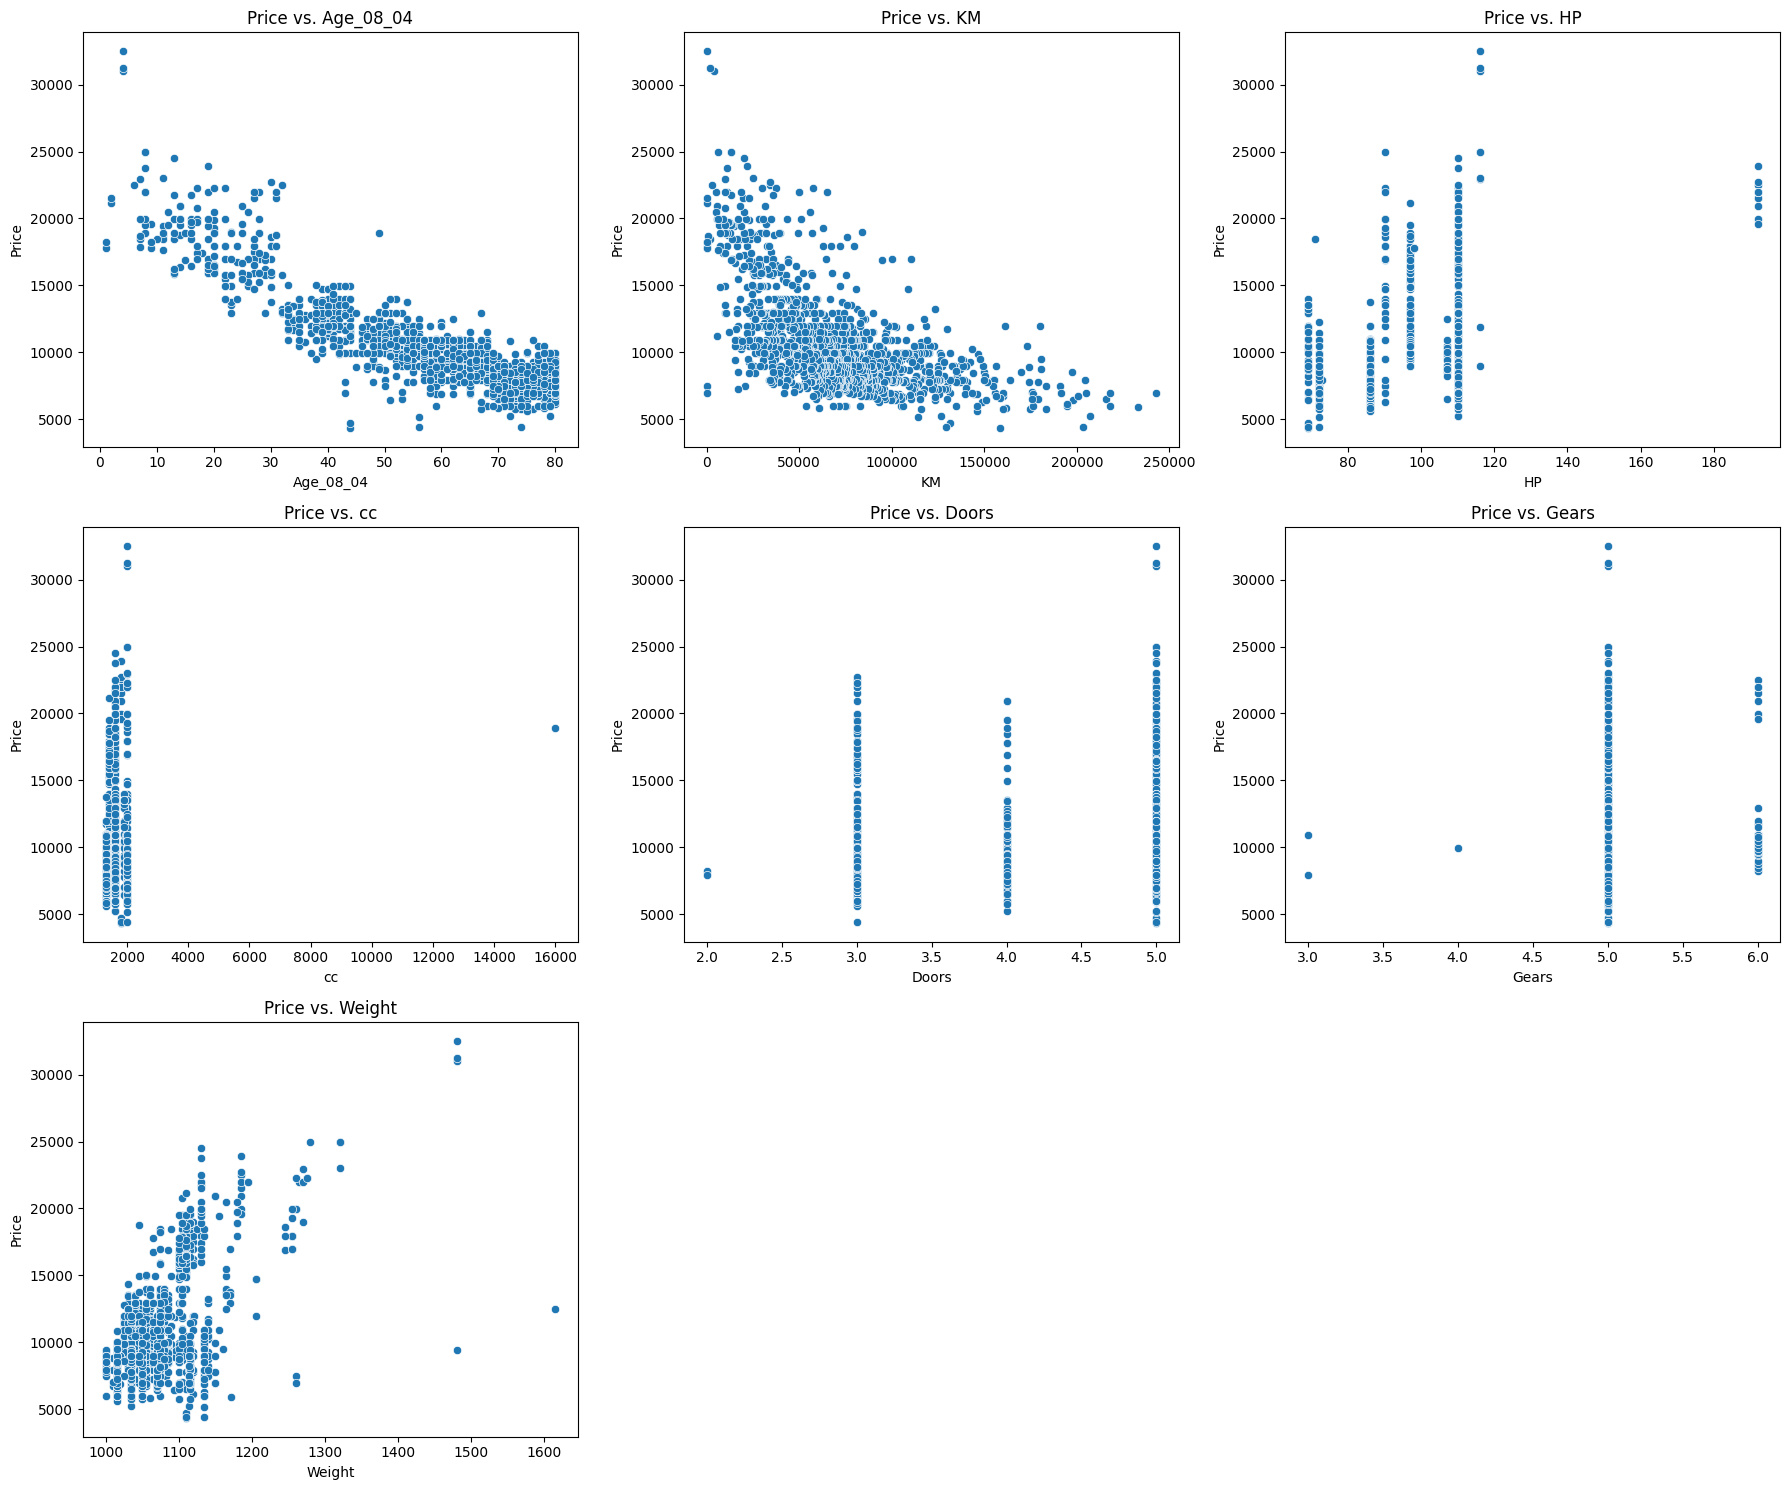

In [8]:
numerical_features_for_scatter = [col for col in numerical_cols if col != 'Price']

num_plots = len(numerical_features_for_scatter)
num_cols_per_row_scatter = 3
num_rows_scatter = (num_plots + num_cols_per_row_scatter - 1) // num_cols_per_row_scatter

fig, axes = plt.subplots(num_rows_scatter, num_cols_per_row_scatter, figsize=(6 * num_cols_per_row_scatter, 5 * num_rows_scatter))
axes = axes.flatten()
for i, col in enumerate(numerical_features_for_scatter):
    sns.scatterplot(x=df[col], y=df['Price'], ax=axes[i])
    axes[i].set_title(f'Price vs. {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

  #Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()



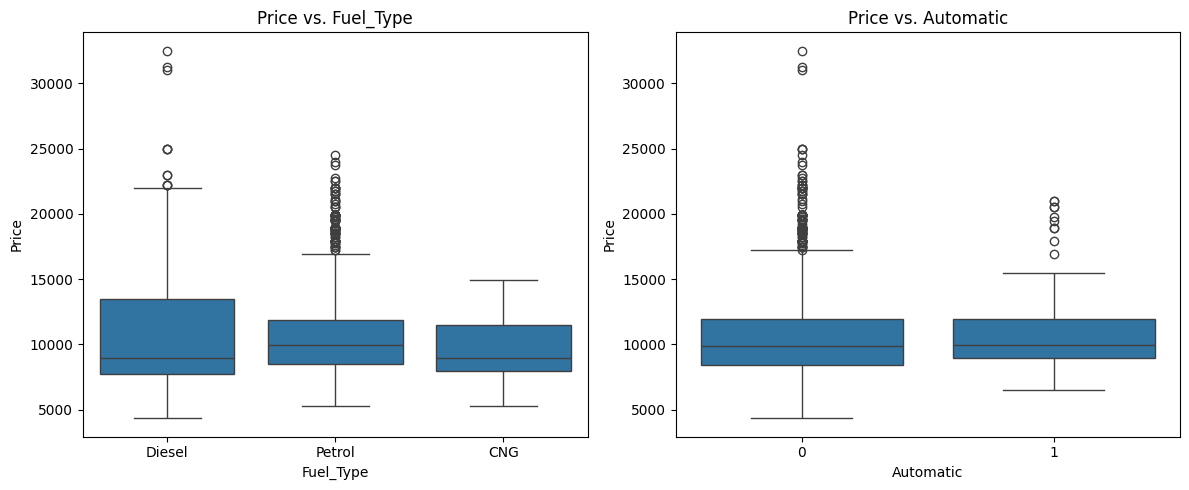

In [9]:
categorical_features = ['Fuel_Type', 'Automatic']

num_plots_cat = len(categorical_features)
num_cols_per_row_cat = 2 # Assuming we want to plot 2 categorical features side by side if possible
num_rows_cat = (num_plots_cat + num_cols_per_row_cat - 1) // num_cols_per_row_cat

fig_cat, axes_cat = plt.subplots(num_rows_cat, num_cols_per_row_cat, figsize=(6 * num_cols_per_row_cat, 5 * num_rows_cat))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_features):
    sns.boxplot(x=df[col], y=df['Price'], ax=axes_cat[i])
    axes_cat[i].set_title(f'Price vs. {col}')
    axes_cat[i].set_xlabel(col)
    axes_cat[i].set_ylabel('Price')

# Hide any unused subplots
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()

In [19]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


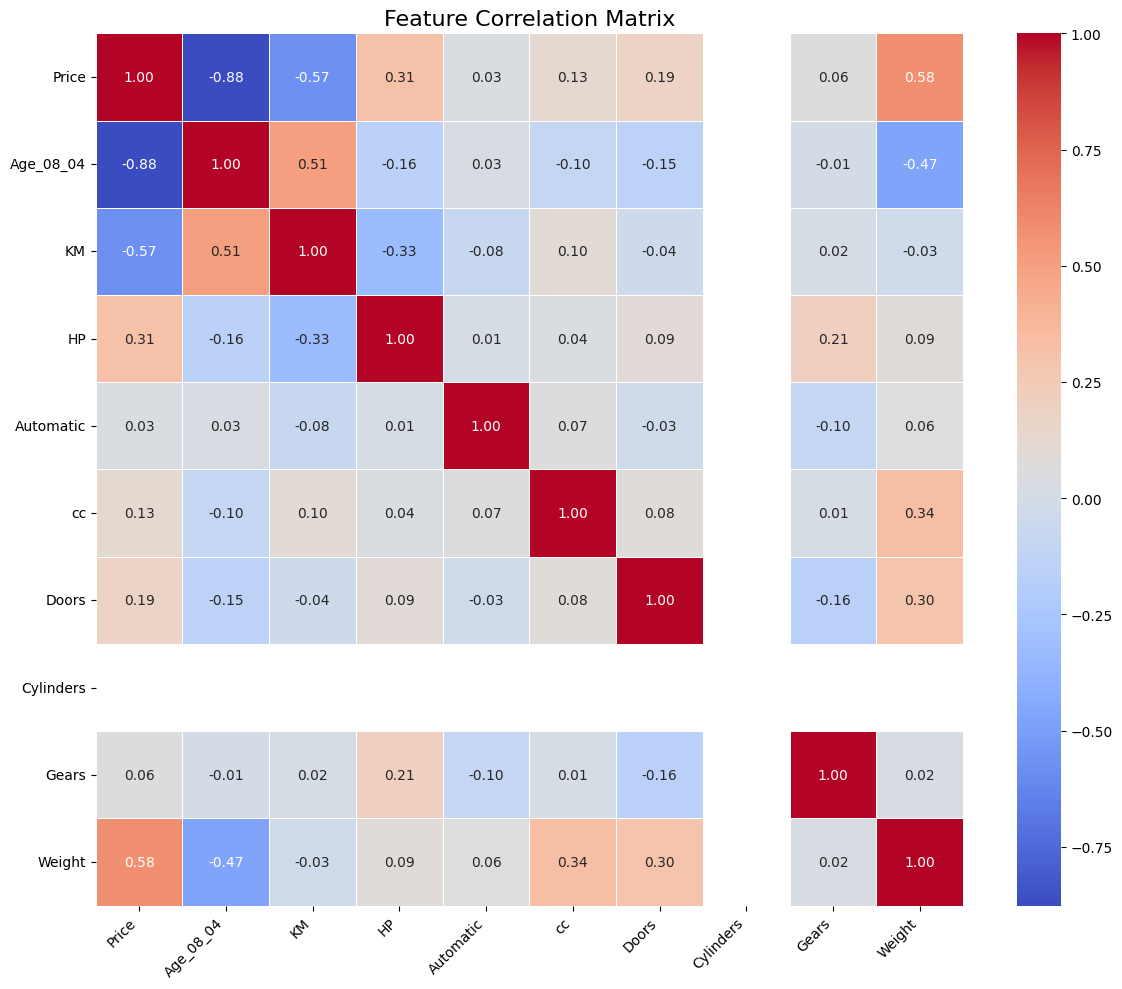

In [10]:
correlation_matrix = df.corr(numeric_only=True) # printing the feature Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
X = df.drop(columns=['Price', 'Cylinders'])
y = df['Price']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1436, 9)
Shape of y: (1436,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1148, 9)
Shape of X_test: (288, 9)
Shape of y_train: (1148,)
Shape of y_test: (288,)


In [13]:
model_full = LinearRegression()
# The 'Fuel_Type' column is categorical (string) and needs to be
# converted into numerical format using one-hot encoding before
# fitting the Linear Regression model.
# Using 'drop_first=True' to avoid multicollinearity.
X_train_processed = pd.get_dummies(X_train, columns=['Fuel_Type'],drop_first=True, dtype=int)


#fitting the model
model_full.fit(X_train_processed, y_train)

print(f"Model Intercept:{model_full.intercept_:.2f}")

coefficients_df_full = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': model_full.coef_
})
print("\nModel Coefficients (Full Feature Model):",coefficients_df_full)



Model Intercept:-14255.39

Model Coefficients (Full Feature Model):             Feature  Coefficient
0         Age_08_04  -120.830458
1                KM    -0.016231
2                HP    14.039479
3         Automatic   148.830927
4                cc    -0.030372
5             Doors   -60.310974
6             Gears   551.600710
7            Weight    25.884958
8  Fuel_Type_Diesel   -68.548757
9  Fuel_Type_Petrol  1370.808910


In [14]:
features_model2 = ['Age_08_04', 'KM', 'HP', 'Weight']

X_train_model2 = X_train[features_model2]

model_strong_corr = LinearRegression()

model_strong_corr.fit(X_train_model2, y_train)

print(f"Model Intercept (Strong Correlations Model): {model_strong_corr.intercept_:.2f}")

coefficients_df_strong_corr = pd.DataFrame({
    'Feature': X_train_model2.columns,
    'Coefficient': model_strong_corr.coef_
})

print("\nModel Coefficients (Strong Correlations Model):", coefficients_df_strong_corr)

Model Intercept (Strong Correlations Model): -5304.97

Model Coefficients (Strong Correlations Model):      Feature  Coefficient
0  Age_08_04  -120.025405
1         KM    -0.020233
2         HP    29.052170
3     Weight    19.769066



Model 1 (Full Feature Model) Performance:
R-squared: 0.8350
Mean Squared Error (MSE): 2201485.97


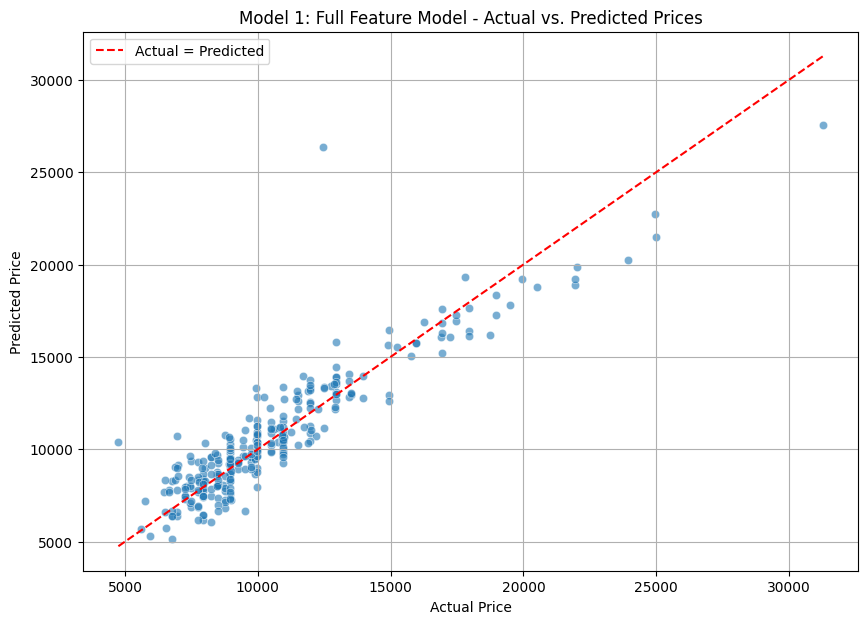

In [15]:
# predictions on the X_test data using model_full
X_test_processed = pd.get_dummies(X_test, columns=['Fuel_Type'], drop_first=True, dtype=int)

missing_cols = set(X_train_processed.columns) - set(X_test_processed.columns)

for c in missing_cols:
    X_test_processed[c] = 0

# Get the columns that are in X_test_processed but were not in X_train_processed
extra_cols = set(X_test_processed.columns) - set(X_train_processed.columns)
# Drop extra columns from X_test_processed
X_test_processed = X_test_processed.drop(columns=list(extra_cols))
X_test_processed = X_test_processed[X_train_processed.columns]#   Reorder columns to match the training data
y_pred_full = model_full.predict(X_test_processed)
r2_full = r2_score(y_test, y_pred_full)  # Calculate the R-squared score
mse_full = mean_squared_error(y_test, y_pred_full)  # Calculate the Mean Squared Error (MSE)


print(f"\nModel 1 (Full Feature Model) Performance:")
print(f"R-squared: {r2_full:.4f}")
print(f"Mean Squared Error (MSE): {mse_full:.2f}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_full, alpha=0.6)
min_val = min(y_test.min(), y_pred_full.min())
max_val = max(y_test.max(), y_pred_full.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Actual = Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model 1: Full Feature Model - Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

--- Model 2: Selected Features Model Performance ---
R-squared: 0.8506
Mean Squared Error (MSE): 1993321.01


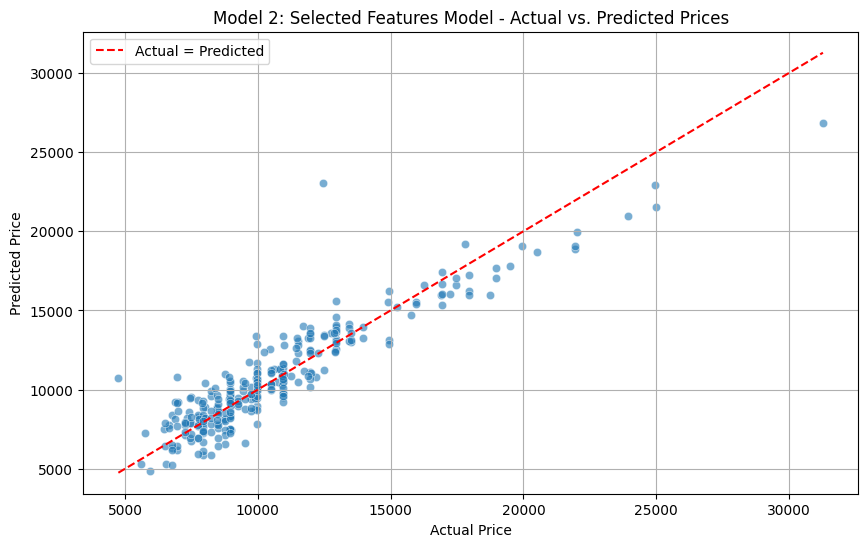

In [16]:

X_test_model2 = X_test[features_model2]# Select the features used for Model 2 from X_test
y_pred_strong_corr = model_strong_corr.predict(X_test_model2)# Make predictions on the test set for Model 2
r2_strong_corr = r2_score(y_test, y_pred_strong_corr)# Calculate R-squared for Model 2
mse_strong_corr = mean_squared_error(y_test, y_pred_strong_corr)#Calculate Mean Squared Error (MSE) for Model 2

print(f"--- Model 2: Selected Features Model Performance ---")
print(f"R-squared: {r2_strong_corr:.4f}")
print(f"Mean Squared Error (MSE): {mse_strong_corr:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_strong_corr, alpha=0.6)


min_val_2 = min(y_test.min(), y_pred_strong_corr.min())
max_val_2 = max(y_test.max(), y_pred_strong_corr.max())
plt.plot([min_val_2, max_val_2], [min_val_2, max_val_2], 'r--', label='Actual = Predicted')


plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Model 2: Selected Features Model - Actual vs. Predicted Prices")
plt.legend()

plt.grid(True)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd

features_model3 = ['Age_08_04', 'HP', 'Fuel_Type_Diesel', 'Automatic', 'Gears']# Define a list of features for Model 3, using 'Automatic_1'
X_train_model3 = X_train_processed[features_model3]# Created a new DataFrame X_train_model3 by selecting these features from X_train_processed
model_alternative = LinearRegression()# Apply LinearRegression model
model_alternative.fit(X_train_model3, y_train)#Fit this new model_alternative to X_train_model3 and y_train
print(f"Model Intercept (Alternative Features Model): {model_alternative.intercept_:.2f}")


coefficients_df_alternative = pd.DataFrame({
    'Feature': X_train_model3.columns,
    'Coefficient': model_alternative.coef_
})

print("\nModel Coefficients (Alternative Features Model):")
print(coefficients_df_alternative)

Model Intercept (Alternative Features Model): 11962.60

Model Coefficients (Alternative Features Model):
            Feature  Coefficient
0         Age_08_04  -161.506175
1                HP    54.570717
2  Fuel_Type_Diesel  1132.534947
3         Automatic  1098.954209
4             Gears   415.823370


--- Model 3: Alternative Features Model Performance ---
R-squared: 0.8030
Mean Squared Error (MSE): 2628945.19


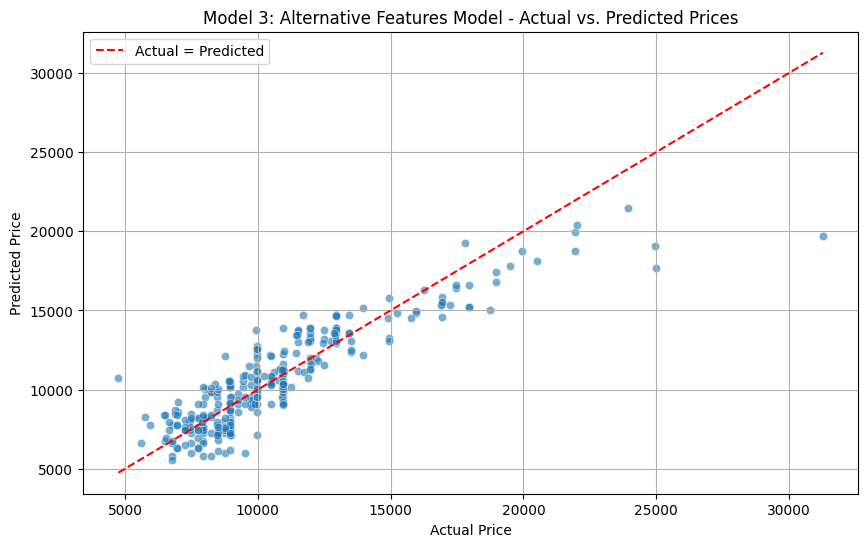

In [21]:

X_test_model3 = X_test_processed[features_model3]# Select the features used for Model 3 from X_test_processed
y_pred_alternative = model_alternative.predict(X_test_model3)# Make predictions on the test set for Model 3
r2_alternative = r2_score(y_test, y_pred_alternative)# Calculate R-squared for Model 3
mse_alternative = mean_squared_error(y_test, y_pred_alternative)# Calculate Mean Squared Error (MSE) for Model 3

print(f"--- Model 3: Alternative Features Model Performance ---")
print(f"R-squared: {r2_alternative:.4f}")
print(f"Mean Squared Error (MSE): {mse_alternative:.2f}")

# scatter plot of actual vs. predicted prices for Model 3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_alternative, alpha=0.6)
min_val_3 = min(y_test.min(), y_pred_alternative.min())
max_val_3 = max(y_test.max(), y_pred_alternative.max())
plt.plot([min_val_3, max_val_3], [min_val_3, max_val_3], 'r--', label='Actual = Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model 3: Alternative Features Model - Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01, random_state=42)#Instantiate a Lasso model with a chosen alpha value (e.g., alpha=0.01)
X_train_processed_lasso = pd.get_dummies(X_train, columns=['Fuel_Type'], drop_first=True, dtype=int)# One-hot encode Fuel_Type for X_train specifically for Lasso model fitting
lasso_model.fit(X_train_processed_lasso, y_train)# Fit the Lasso model to the training data
print(f"Lasso Model Intercept: {lasso_model.intercept_:.2f}")
coefficients_df_lasso = pd.DataFrame({
    'Feature': X_train_processed_lasso.columns, # Use X_train_processed_lasso.columns for correct feature names
    'Coefficient': lasso_model.coef_
})

print("\nLasso Model Coefficients:")
print(coefficients_df_lasso)

Lasso Model Intercept: -14252.65

Lasso Model Coefficients:
            Feature  Coefficient
0         Age_08_04  -120.830134
1                KM    -0.016232
2                HP    14.044676
3         Automatic   148.676633
4                cc    -0.030392
5             Doors   -60.294596
6             Gears   551.306478
7            Weight    25.883328
8  Fuel_Type_Diesel   -68.186362
9  Fuel_Type_Petrol  1370.744742


In [23]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model with a chosen alpha value (e.g., alpha=1.0) and set random_state
ridge_model = Ridge(alpha=1.0, random_state=42)
X_train_processed_ridge = pd.get_dummies(X_train, columns=['Fuel_Type'], drop_first=True, dtype=int)# One-hot encode Fuel_Type for X_train specifically for Ridge model fitting
ridge_model.fit(X_train_processed_ridge, y_train)#  Fit the Ridge model to the training data
print(f"Ridge Model Intercept: {ridge_model.intercept_:.2f}")
coefficients_df_ridge = pd.DataFrame({
    'Feature': X_train_processed_ridge.columns, # Use X_train_processed_ridge.columns for correct feature names
    'Coefficient': ridge_model.coef_
})

print("\nRidge Model Coefficients:")
print(coefficients_df_ridge)

Ridge Model Intercept: -14075.04

Ridge Model Coefficients:
            Feature  Coefficient
0         Age_08_04  -120.779659
1                KM    -0.016324
2                HP    14.141834
3         Automatic   146.907470
4                cc    -0.030509
5             Doors   -59.905791
6             Gears   542.272328
7            Weight    25.821019
8  Fuel_Type_Diesel  -128.813072
9  Fuel_Type_Petrol  1294.949826


--- Lasso Regression Model Performance ---
R-squared: 0.8350
Mean Squared Error (MSE): 2201415.63


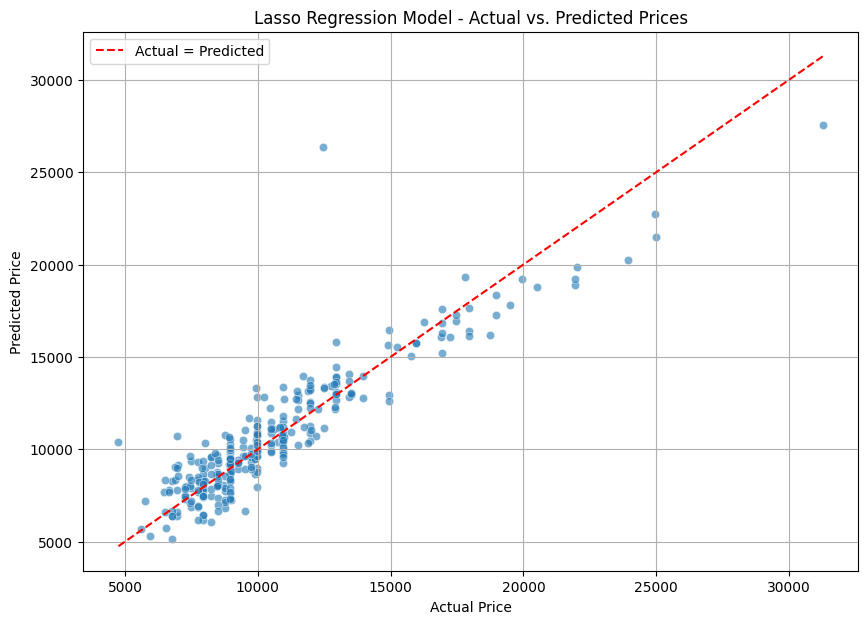

In [24]:

# Instantiate and fit lasso_model
lasso_model = Lasso(alpha=0.01, random_state=42) # Use the same alpha as previously

# One-hot encode Fuel_Type for X_train
X_train_processed_lasso = pd.get_dummies(X_train, columns=['Fuel_Type'], drop_first=True, dtype=int)

# Fit the Lasso model to the training data
lasso_model.fit(X_train_processed_lasso, y_train)

# One-hot encode Fuel_Type for X_test
X_test_processed_lasso = pd.get_dummies(X_test, columns=['Fuel_Type'], drop_first=True, dtype=int)

# Align columns between X_train_processed_lasso and X_test_processed_lasso
missing_cols_lasso = set(X_train_processed_lasso.columns) - set(X_test_processed_lasso.columns)
for c in missing_cols_lasso:
    X_test_processed_lasso[c] = 0

extra_cols_lasso = set(X_test_processed_lasso.columns) - set(X_train_processed_lasso.columns)
X_test_processed_lasso = X_test_processed_lasso.drop(columns=list(extra_cols_lasso))

X_test_processed_lasso = X_test_processed_lasso[X_train_processed_lasso.columns]

# Make predictions on the X_test data using lasso_model
y_pred_lasso = lasso_model.predict(X_test_processed_lasso)

# Calculate the R-squared score
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calculate the Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


print(f"--- Lasso Regression Model Performance ---")
print(f"R-squared: {r2_lasso:.4f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6)
min_val_lasso = min(y_test.min(), y_pred_lasso.min())
max_val_lasso = max(y_test.max(), y_pred_lasso.max())
plt.plot([min_val_lasso, max_val_lasso], [min_val_lasso, max_val_lasso], 'r--', label='Actual = Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression Model - Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

--- Ridge Regression Model Performance ---
R-squared: 0.8353
Mean Squared Error (MSE): 2197516.88


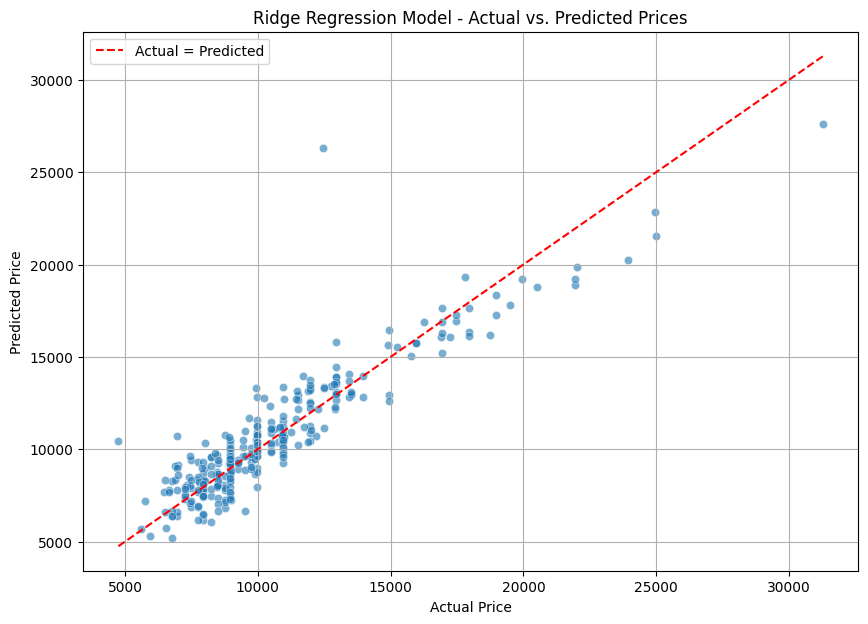

In [25]:

# One-hot encode Fuel_Type for X_test for Ridge model evaluation
X_test_processed_ridge = pd.get_dummies(X_test, columns=['Fuel_Type'], drop_first=True, dtype=int)

# Align columns between X_train_processed_ridge and X_test_processed_ridge
missing_cols_ridge = set(X_train_processed_ridge.columns) - set(X_test_processed_ridge.columns)
for c in missing_cols_ridge:
    X_test_processed_ridge[c] = 0

extra_cols_ridge = set(X_test_processed_ridge.columns) - set(X_train_processed_ridge.columns)
X_test_processed_ridge = X_test_processed_ridge.drop(columns=list(extra_cols_ridge))

X_test_processed_ridge = X_test_processed_ridge[X_train_processed_ridge.columns]

#  Make predictions on the X_test data using ridge_model
y_pred_ridge = ridge_model.predict(X_test_processed_ridge)

# Calculate the R-squared score
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate the Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


print(f"--- Ridge Regression Model Performance ---")
print(f"R-squared: {r2_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")


plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
min_val_ridge = min(y_test.min(), y_pred_ridge.min())
max_val_ridge = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val_ridge, max_val_ridge], [min_val_ridge, max_val_ridge], 'r--', label='Actual = Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression Model - Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

**Interview Questions:**


1.What is Normalization & Standardization and how is it helpful?


Normalization : Normalization is process of rescaling the numerical data in machine learning  to a standard range typically From ( 0 to 1) and it is helpful in improving the model performance.


Standardization: Standardization is process of rescaling a data to have mean 0 or standard deviation 1. Its help in improving the model interpretability and also model performance.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables are highly correlated, leading to unstable estimate of regression coefficients.


Techniques used to address multicollinearity in MLR are:


1.Lasso Regression


2.Ridge Regression


3.Correlation Matrix etc
